In [4]:
#import library we need to it 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers,models
from keras import models
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
# to remove warnings messages
import warnings
# Simple warning suppression
warnings.filterwarnings("ignore")

In [5]:
# make a wrangle fun to set data 
def wrangle(filepath1,filepath2,filepath3,filepath4):
    
    #define my data set 
    X_train=pd.read_csv(filepath1).to_numpy() # for image train 
    
    y_train=pd.read_csv(filepath2).to_numpy()-1 # for label train
    
    x_test=pd.read_csv(filepath3).to_numpy()  # for image test 
    
    y_test=pd.read_csv(filepath4).to_numpy()-1 # for label test
    
    # Reshape flattened image data (1D) to 4D format (32x32 grayscale) for convolutional neural networks (CNNs).
    X_train = X_train.reshape(-1,32,32,1)
    x_test = x_test.reshape(-1,32,32,1)
    
    # the target variable (y train and test) often represents different classes we must convert to categrol data
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return X_train,y_train,x_test,y_test


In [6]:
# we dont need for split this data to train and test 
X_train,y_train,x_test,y_test=wrangle("csvTrainImages 13440x1024.csv","csvTrainLabel 13440x1.csv","csvTestImages 3360x1024.csv","csvTestLabel 3360x1.csv")


In [7]:
# shape of X train and test afetr reshaping
print('X_train shape is ',X_train.shape)
print('X_test shape is ',x_test.shape)


X_train shape is  (13439, 32, 32, 1)
X_test shape is  (3359, 32, 32, 1)


In [8]:
# shape of y train and test afetr reshaping
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)


y_train shape is  (13439, 28)
y_test shape is  (3359, 28)


In [9]:
# Now we can do data Augmentation for normalize my data to be faster 
gen=ImageDataGenerator(zoom_range=0.3 ,rescale=1.0/255.0,horizontal_flip=False)
train_data=gen.flow(X_train, y_train)
print(X_train[:2])

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


28


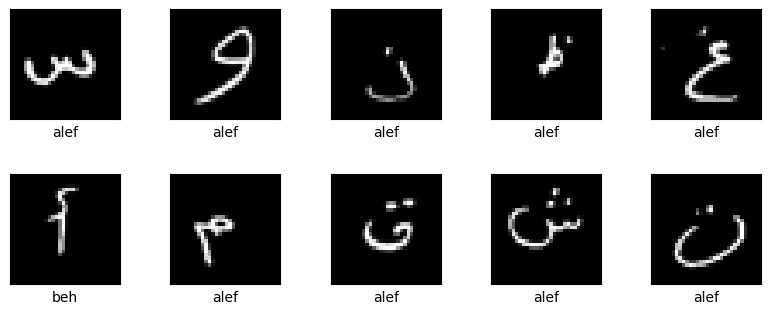

In [10]:
arabic_chars = ['alef','beh','teh','theh','jeem','hah','khah','dal','thal','reh','zain','seen','sheen','sad','dad','tah','zah','ain','ghain','feh','qaf','kaf','lam','meem','noon','heh','waw','yeh']
print(len(arabic_chars))
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[ra[i]].reshape(32, 32).T, "gray")
    plt.xlabel(arabic_chars[int(y_train[ra[i]][0])], fontsize=10, color='black', ha='center')
    plt.subplots_adjust(hspace=0.5)
plt.show()

In [11]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(32, 32, 1)))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(28, activation="softmax"))

In [12]:
model.compile(optimizer='adam' , loss= 'categorical_crossentropy' , metrics=['accuracy'] )

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 12, 12, 32)        128       
 Normalization)                                         

In [14]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)
train_gen = datagen.flow(X_train, y_train, batch_size=64)
test_gen  = datagen.flow(x_test , y_test , batch_size=64)

In [15]:
# Train the model using the data generator
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

history = model.fit(
    train_gen,
    epochs=30,
    verbose=1,
    steps_per_epoch=X_train.shape[0] // 64,
    validation_data=test_gen,
    validation_steps=x_test.shape[0] // 64,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/30


209/209 [==============================] - ETA: 0s - loss: 2.3541 - accuracy: 0.2567
Epoch 1: val_accuracy improved from -inf to 0.39483, saving model to best.hdf5
209/209 [==============================] - 22s 91ms/step - loss: 2.3541 - accuracy: 0.2567 - val_loss: 1.9160 - val_accuracy: 0.3948
Epoch 2/30
209/209 [==============================] - ETA: 0s - loss: 1.1654 - accuracy: 0.5907
Epoch 2: val_accuracy improved from 0.39483 to 0.71244, saving model to best.hdf5
209/209 [==============================] - 19s 89ms/step - loss: 1.1654 - accuracy: 0.5907 - val_loss: 0.8347 - val_accuracy: 0.7124
Epoch 3/30
209/209 [==============================] - ETA: 0s - loss: 0.6429 - accuracy: 0.7861
Epoch 3: val_accuracy improved from 0.71244 to 0.79177, saving model to best.hdf5
209/209 [==============================] - 18s 88ms/step - loss: 0.6429 - accuracy: 0.7861 - val_loss: 0.6589 - val_accuracy: 0.7918
Epoch 4/30
209/209 [==============================] - ETA: 0s - loss

In [16]:
# Evaluate the model on the test set
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {val_loss}, Test Accuracy: {val_acc}')

105/105 [==============================] - 2s 15ms/step - loss: 0.1740 - accuracy: 0.9625
Test Loss: 0.17401017248630524, Test Accuracy: 0.9624888300895691


In [17]:
# Make predictions on the test set
predictions = model.predict(x_test)

105/105 [==============================] - 2s 15ms/step


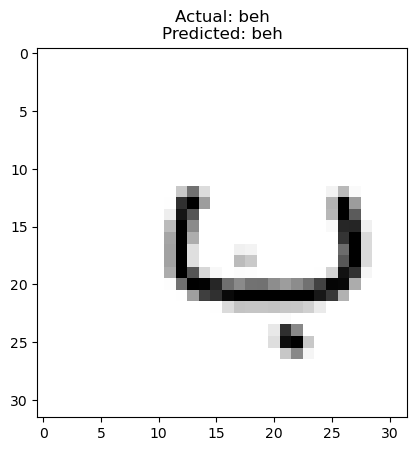

In [18]:
# Assuming x_test is the original test dataset, you can access a specific example
example_index = 2
sample_image = x_test[example_index].reshape(32, 32).T
actual_label = np.argmax(y_test[example_index])
predicted_label = np.argmax(predictions[example_index])

# Display the image along with the predicted and actual labels
plt.imshow(sample_image, cmap=plt.cm.gray_r)
plt.title(f'Actual: {arabic_chars[actual_label]}\nPredicted: {arabic_chars[predicted_label]}')
plt.show()

105/105 [==============================] - 2s 16ms/step


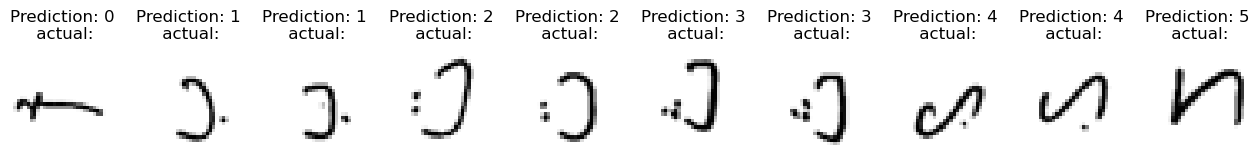

In [19]:
pred=model.predict([x_test])
pred = [np.argmax(i) for i in pred]
_,axes = plt.subplots(nrows=1,ncols=10 , figsize=(16,4))
for ax,image, actual, prediction in zip(axes,x_test,y_test,pred):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r)
    ax.set_title(f'Prediction: {prediction}\n actual:')
    

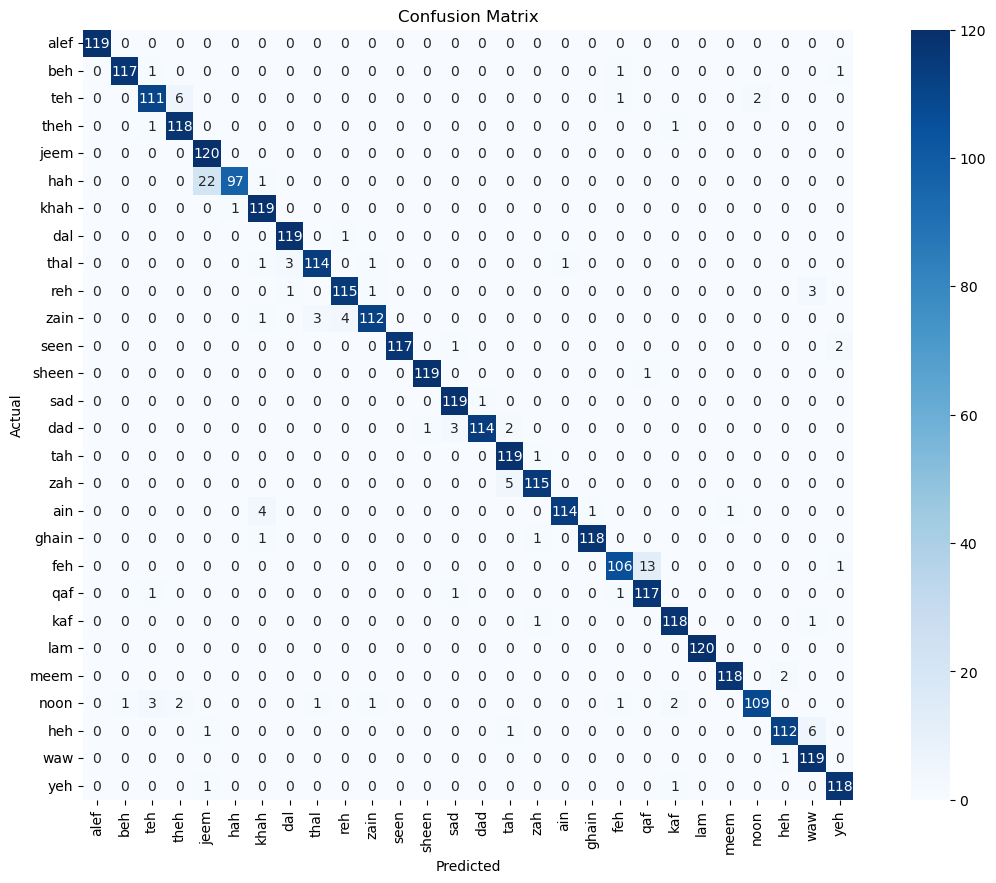

In [20]:
#confusion matrix for cnn 
# Assuming predictions are the predicted labels in one-hot encoded form
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

# Convert confusion matrix to a DataFrame for better visualization
conf_df = pd.DataFrame(conf_matrix, index=arabic_chars, columns=arabic_chars)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=True, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [21]:
# Flatten the images for SVM
X_train_svm = X_train.reshape(X_train.shape[0], -1)
x_test_svm = x_test.reshape(x_test.shape[0], -1)

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train_svm, np.argmax(y_train, axis=1))

SVC()

In [24]:
# Evaluate the SVM model on the test set
svm_predictions = svm_model.predict(x_test_svm)
svm_accuracy = accuracy_score(np.argmax(y_test, axis=1), svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')

SVM Accuracy: 0.6528728788329861


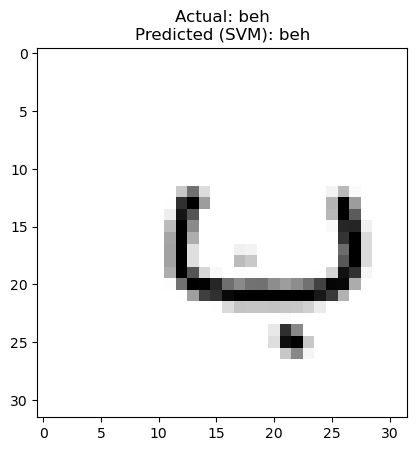

In [25]:
# Assuming x_test_svm is the original test dataset for SVM
example_index_svm = 2
sample_image_svm = x_test_svm[example_index_svm].reshape(32, 32).T
actual_label_svm = np.argmax(y_test[example_index_svm])
svm_predicted_label = svm_predictions[example_index_svm]

# Display the image along with the predicted and actual labels for SVM
plt.imshow(sample_image_svm, cmap=plt.cm.gray_r)
plt.title(f'Actual: {arabic_chars[actual_label_svm]}\nPredicted (SVM): {arabic_chars[svm_predicted_label]}')
plt.show()


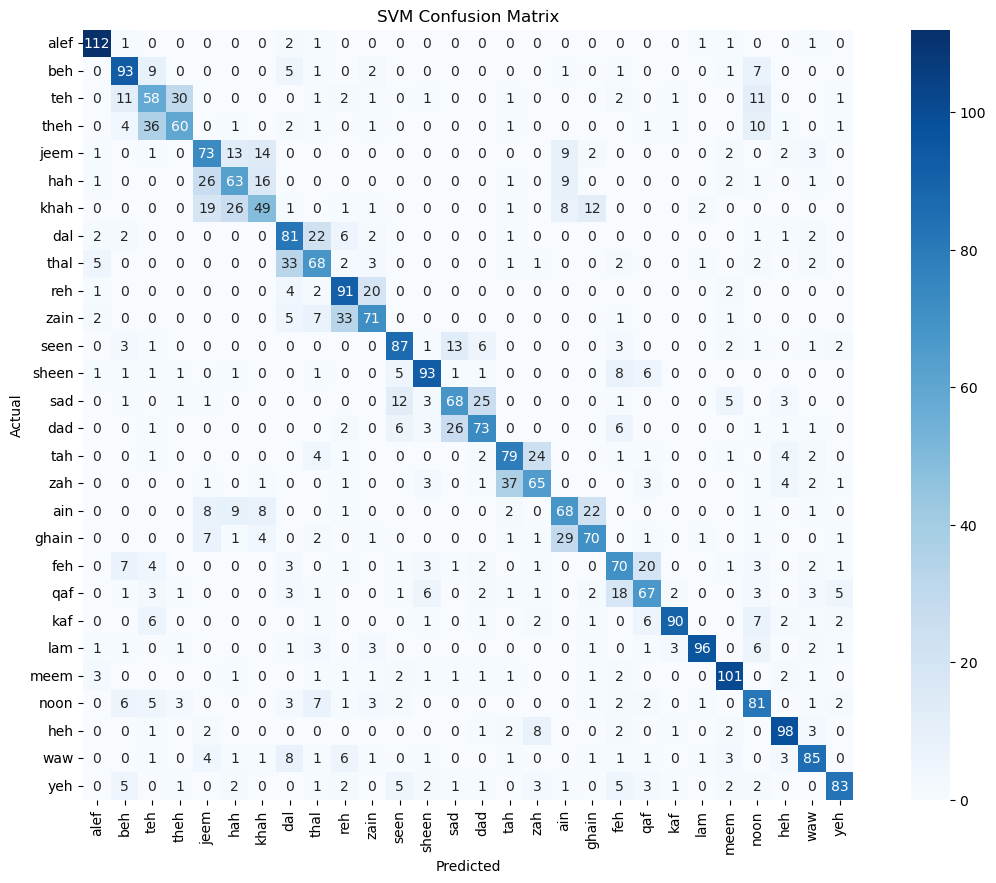

In [26]:
# Assuming svm_predictions are the predicted labels for the SVM model
svm_conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), svm_predictions)

# Convert confusion matrix to a DataFrame for better visualization
svm_conf_df = pd.DataFrame(svm_conf_matrix, index=arabic_chars, columns=arabic_chars)

# Plot the confusion matrix for SVM using seaborn
plt.figure(figsize=(15, 10))S
sns.heatmap(svm_conf_df, annot=True, fmt='d', cmap='Blues', cbar=True, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()
